# Regularization
## Umplementing Linear and Logistic Regression Using Regularization

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 20,10

In [3]:
train = pd.read_table('../Dataset/Housing Prices/ex3x.dat',names=['Area','Bedrooms'],delim_whitespace=True)
y = pd.read_table('../Dataset/Housing Prices/ex3y.dat',names=['Price'],delim_whitespace=True)
print 'Shape(X) : {}'.format(train.shape)
print 'Shape(y) : {}'.format(y.shape)

Shape(X) : (47, 2)
Shape(y) : (47, 1)


In [4]:
train.head()

,Area,Bedrooms
0,2104.0,3.0
1,1600.0,3.0
2,2400.0,3.0
3,1416.0,2.0
4,3000.0,4.0


In [5]:
y.head()

,Price
0,399900.0
1,329900.0
2,369000.0
3,232000.0
4,539900.0


<IPython.core.display.Javascript object>


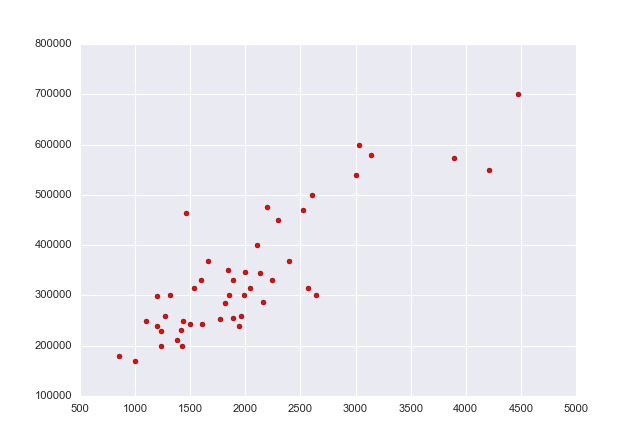

In [6]:
plt.scatter(train.iloc[:,0],y,c='r')

In [7]:
train['Area^2'] = train.Area**2
train.head()

,Area,Bedrooms,Area^2
0,2104.0,3.0,4426816.0
1,1600.0,3.0,2560000.0
2,2400.0,3.0,5760000.0
3,1416.0,2.0,2005056.0
4,3000.0,4.0,9000000.0


In [8]:
X = train.drop(['Bedrooms'],axis=1)
X.head()

,Area,Area^2
0,2104.0,4426816.0
1,1600.0,2560000.0
2,2400.0,5760000.0
3,1416.0,2005056.0
4,3000.0,9000000.0


In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
print 'Mean: {}, Standard Deviation: {}'.format(np.mean(X),np.std(X))

Mean: 5.31489745831e-17, Standard Deviation: 1.0


In [10]:
y = StandardScaler().fit(y).transform(y)
print 'Mean: {}, Standard Deviation: {}'.format(np.mean(y),np.std(y))

Mean: -6.61409461479e-17, Standard Deviation: 1.0


In [11]:
X = pd.DataFrame(X,columns=['Area','Area^2'])
X['Bias'] = np.ones((X.shape[0],))
X.head()

,Area,Area^2,Bias
0,0.131415,-0.047860,1.0
1,-0.509641,-0.508354,1.0
2,0.507909,0.281001,1.0
3,-0.743677,-0.645244,1.0
4,1.271071,1.080222,1.0


In [12]:
def J(X,y,theta,m,lamda):
    '''
        Returns the error for the 
        given value of the theta
    '''
    try:
        X,y = X.values,y.values
    except:
        pass
    error = sum((np.dot(X,theta) - y)**2) + lamda*sum((theta[1:,0])**2)
    return error/(2*m)

In [13]:
def gradient(X,y,theta,m,lamda,alpha):
    '''
        Returns the gradient for
        the given values of theta
    '''
    theta_copy = theta.copy()
    theta_copy[0] = 0.0
    grad = alpha*(np.dot(X.T,(np.dot(X,theta) - y))/m + (lamda/m)*theta_copy)
    return grad

In [14]:
theta = np.asarray([0.0,0.0,0.0]).reshape(-1,1)
m = X.shape[0]
alpha = 0.01
lamda = 0.00

In [15]:
for i in range(1000):
    print 'Cost: {}'.format(J(X,y,theta,m,lamda))
    theta = theta - gradient(X,y,theta,m,lamda,alpha)

Cost: [ 0.5]
Cost: [ 0.48588918]
Cost: [ 0.47233055]
Cost: [ 0.4593025]
Cost: [ 0.44678427]
Cost: [ 0.43475589]
Cost: [ 0.42319821]
Cost: [ 0.41209279]
Cost: [ 0.40142193]
Cost: [ 0.39116863]
Cost: [ 0.38131654]
Cost: [ 0.37184996]
Cost: [ 0.3627538]
Cost: [ 0.35401357]
Cost: [ 0.34561533]
Cost: [ 0.3375457]
Cost: [ 0.32979181]
Cost: [ 0.32234132]
Cost: [ 0.31518233]
Cost: [ 0.30830345]
Cost: [ 0.30169372]
Cost: [ 0.29534259]
Cost: [ 0.28923995]
Cost: [ 0.28337606]
Cost: [ 0.2777416]
Cost: [ 0.27232757]
Cost: [ 0.26712535]
Cost: [ 0.26212665]
Cost: [ 0.2573235]
Cost: [ 0.25270825]
Cost: [ 0.24827355]
Cost: [ 0.24401232]
Cost: [ 0.23991779]
Cost: [ 0.23598342]
Cost: [ 0.23220295]
Cost: [ 0.22857035]
Cost: [ 0.22507984]
Cost: [ 0.22172586]
Cost: [ 0.21850305]
Cost: [ 0.21540629]
Cost: [ 0.21243065]
Cost: [ 0.20957138]
Cost: [ 0.20682392]
Cost: [ 0.20418392]
Cost: [ 0.20164714]
Cost: [ 0.19920957]
Cost: [ 0.19686731]
Cost: [ 0.19461663]
Cost: [ 0.19245395]
Cost: [ 0.19037583]
Cost: [ 0.18

In [16]:
print 'Theta0: {} Theta1: {} Theta2: {}'.format(theta[0],theta[1],theta[2])

Theta0: [ 0.52431268] Theta1: [ 0.32980411] Theta2: [ -1.31431509e-16]


We observe that the value of theta2 has been decreased to almost to zero owing to the zero participation of that feature as the relationship between the response and the parameter 'Area' is linear! =)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


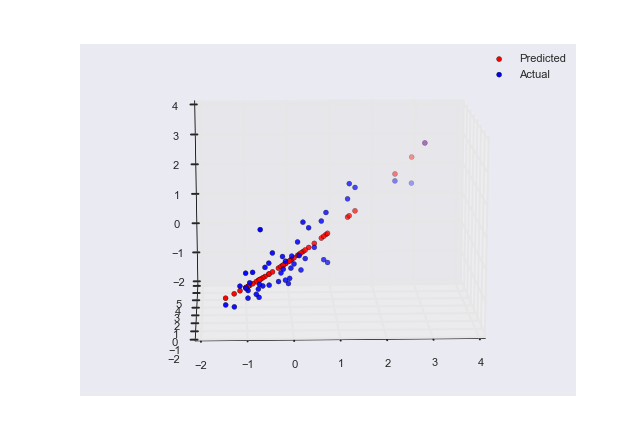

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],np.dot(X,theta)[:,0],c='r',label='Predicted')
ax.scatter(X.iloc[:,0],X.iloc[:,1],y[:,0],label='Actual')
plt.legend()